In [1]:
#!rm -rf code
#!git clone https://xxxx/yyyy.git code
#!mv code/* .
%load_ext autoreload
%autoreload 2
%matplotlib inline
from helpers import *
from matplotlib import pyplot as plt
import numpy as np
from experiment_datasets import *
import pandas as pd
import seaborn as sns
import pickle
from IPython.display import clear_output
import matplotlib
from scipy.optimize import curve_fit

Using TensorFlow backend.


Initialized TensorFlow


In [2]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)

In [3]:
# pfailure for the first layer
p = 1e-2
np.random.seed(42)

In [4]:
repetitions = 10
Ns = np.arange(10, 200, 20)
print('Total runs: %d' % (repetitions * len(Ns)))

Total runs: 100


In [5]:
def q_factor_v(vect):
    """ q = v^min/v^min, see the main paper """
    vect = np.abs(vect)
    assert np.max(vect) > 0, "Cannot compute for vector of zeros """
    return np.min(vect) / np.max(vect)
def q_factor_l1(exp):
    """ q-factor for layer 1 of an experiment """
    W = exp.W[0]
    
    # here taking sum for 1st axis since it's not transposed here
    q = q_factor_v(np.sum(np.abs(W), axis = 1))
    
    return q
def d_kl(a, b):
    """ KL-divergence between numbers """
    a, b = float(a), float(b)
    return a * np.log(a / b) + (1 - a) * np.log((1 - a) / (1 - b))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_2 (Dense)              (None, 49)                539       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 50        
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________
Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 0s 664us/step - loss: 532.1563 - categorical_accuracy: 1.0000 - mean_squared_error: 526.0643 - mean_absolute_error: 20.9733 - val_loss: 558.2886 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 552.2575 - val_mean_absolute_error: 21.6145
Epoch 2/200
404/404 [==============================] - 0s

Epoch 26/200
404/404 [==============================] - 0s 5us/step - loss: 492.6250 - categorical_accuracy: 1.0000 - mean_squared_error: 488.0991 - mean_absolute_error: 20.0539 - val_loss: 517.3213 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 512.8389 - val_mean_absolute_error: 20.6947
Epoch 27/200
404/404 [==============================] - 0s 6us/step - loss: 491.0855 - categorical_accuracy: 1.0000 - mean_squared_error: 486.6031 - mean_absolute_error: 20.0169 - val_loss: 515.6948 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 511.2596 - val_mean_absolute_error: 20.6568
Epoch 28/200
404/404 [==============================] - 0s 5us/step - loss: 489.5358 - categorical_accuracy: 1.0000 - mean_squared_error: 485.1006 - mean_absolute_error: 19.9796 - val_loss: 513.9666 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 509.5815 - val_mean_absolute_error: 20.6164
Epoch 29/200
404/404 [==============================] - 0s 5us/step - loss: 487.9627 - c

Epoch 53/200
404/404 [==============================] - 0s 5us/step - loss: 450.5678 - categorical_accuracy: 1.0000 - mean_squared_error: 447.0602 - mean_absolute_error: 19.0174 - val_loss: 473.7061 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 470.2272 - val_mean_absolute_error: 19.6538
Epoch 54/200
404/404 [==============================] - 0s 5us/step - loss: 449.0203 - categorical_accuracy: 1.0000 - mean_squared_error: 445.5414 - mean_absolute_error: 18.9776 - val_loss: 472.1028 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 468.6489 - val_mean_absolute_error: 19.6132
Epoch 55/200
404/404 [==============================] - 0s 5us/step - loss: 447.4029 - categorical_accuracy: 1.0000 - mean_squared_error: 443.9490 - mean_absolute_error: 18.9359 - val_loss: 470.5132 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 467.0905 - val_mean_absolute_error: 19.5730
Epoch 56/200
404/404 [==============================] - 0s 5us/step - loss: 445.8506 - c

Epoch 80/200
404/404 [==============================] - 0s 5us/step - loss: 409.1631 - categorical_accuracy: 1.0000 - mean_squared_error: 406.3018 - mean_absolute_error: 17.9220 - val_loss: 431.0514 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 428.2102 - val_mean_absolute_error: 18.5598
Epoch 81/200
404/404 [==============================] - 0s 5us/step - loss: 407.6408 - categorical_accuracy: 1.0000 - mean_squared_error: 404.7996 - mean_absolute_error: 17.8803 - val_loss: 429.4983 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 426.6761 - val_mean_absolute_error: 18.5188
Epoch 82/200
404/404 [==============================] - 0s 6us/step - loss: 406.1169 - categorical_accuracy: 1.0000 - mean_squared_error: 403.2948 - mean_absolute_error: 17.8385 - val_loss: 427.9440 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 425.1414 - val_mean_absolute_error: 18.4776
Epoch 83/200
404/404 [==============================] - 0s 5us/step - loss: 404.5979 - c

Epoch 107/200
404/404 [==============================] - 0s 5us/step - loss: 367.1131 - categorical_accuracy: 1.0000 - mean_squared_error: 364.6898 - mean_absolute_error: 16.7361 - val_loss: 387.4052 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 384.9958 - val_mean_absolute_error: 17.3689
Epoch 108/200
404/404 [==============================] - 0s 5us/step - loss: 365.4977 - categorical_accuracy: 1.0000 - mean_squared_error: 363.0883 - mean_absolute_error: 16.6888 - val_loss: 385.6982 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 383.3025 - val_mean_absolute_error: 17.3218
Epoch 109/200
404/404 [==============================] - 0s 5us/step - loss: 363.8766 - categorical_accuracy: 1.0000 - mean_squared_error: 361.4809 - mean_absolute_error: 16.6413 - val_loss: 383.9977 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 381.6150 - val_mean_absolute_error: 17.2744
Epoch 110/200
404/404 [==============================] - 0s 5us/step - loss: 362.2487

Epoch 134/200
404/404 [==============================] - 0s 5us/step - loss: 321.4504 - categorical_accuracy: 1.0000 - mean_squared_error: 319.3543 - mean_absolute_error: 15.3474 - val_loss: 339.7332 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 337.6482 - val_mean_absolute_error: 15.9884
Epoch 135/200
404/404 [==============================] - 0s 5us/step - loss: 319.7029 - categorical_accuracy: 1.0000 - mean_squared_error: 317.6179 - mean_absolute_error: 15.2920 - val_loss: 337.9041 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 335.8278 - val_mean_absolute_error: 15.9350
Epoch 136/200
404/404 [==============================] - 0s 5us/step - loss: 317.9557 - categorical_accuracy: 1.0000 - mean_squared_error: 315.8794 - mean_absolute_error: 15.2363 - val_loss: 336.0671 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 334.0019 - val_mean_absolute_error: 15.8812
Epoch 137/200
404/404 [==============================] - 0s 5us/step - loss: 316.2030

Epoch 161/200
404/404 [==============================] - 0s 5us/step - loss: 272.9510 - categorical_accuracy: 1.0000 - mean_squared_error: 271.0954 - mean_absolute_error: 13.7558 - val_loss: 288.6807 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 286.8325 - val_mean_absolute_error: 14.4873
Epoch 162/200
404/404 [==============================] - 0s 6us/step - loss: 271.0975 - categorical_accuracy: 1.0000 - mean_squared_error: 269.2494 - mean_absolute_error: 13.6939 - val_loss: 286.7217 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 284.8814 - val_mean_absolute_error: 14.4274
Epoch 163/200
404/404 [==============================] - 0s 5us/step - loss: 269.2381 - categorical_accuracy: 1.0000 - mean_squared_error: 267.3978 - mean_absolute_error: 13.6298 - val_loss: 284.7660 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 282.9318 - val_mean_absolute_error: 14.3660
Epoch 164/200
404/404 [==============================] - 0s 5us/step - loss: 267.3850

Epoch 188/200
404/404 [==============================] - 0s 6us/step - loss: 223.2077 - categorical_accuracy: 1.0000 - mean_squared_error: 221.4958 - mean_absolute_error: 11.9891 - val_loss: 236.7506 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 235.0436 - val_mean_absolute_error: 12.8530
Epoch 189/200
404/404 [==============================] - 0s 5us/step - loss: 221.5464 - categorical_accuracy: 1.0000 - mean_squared_error: 219.8394 - mean_absolute_error: 11.9252 - val_loss: 235.0322 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 233.3295 - val_mean_absolute_error: 12.7971
Epoch 190/200
404/404 [==============================] - 0s 5us/step - loss: 219.8610 - categorical_accuracy: 1.0000 - mean_squared_error: 218.1583 - mean_absolute_error: 11.8595 - val_loss: 233.3313 - val_categorical_accuracy: 1.0000 - val_mean_squared_error: 231.6333 - val_mean_absolute_error: 12.7417
Epoch 191/200
404/404 [==============================] - 0s 7us/step - loss: 218.1879

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


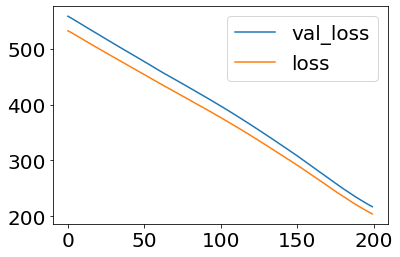

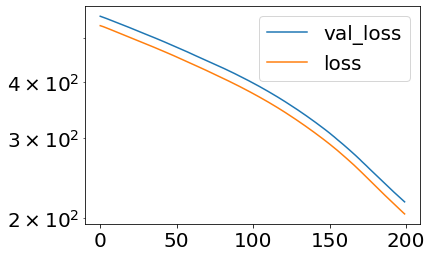

Creating network for 13-dimensional input and 1-dimensional output, with 2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                140       
_________________________________________________________________
Crashes (Lambda)             (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 49)                539       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 50        
Total params: 729
Trainable params: 729
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                

In [6]:
exp = BostonHousingExperiment(N = [10, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 200, do_print = True,
                                  reg_coeff = 1, reg_type = 'balanced')

In [7]:
# printing the q-factor
q_factor_l1(exp)

0.77926767

In [8]:
# obtaining one input
x = np.array([exp.x_train[0]])
y = np.array([exp.y_train[0]])

In [9]:
def train_the_net(N = 50, mu = 1):
    """ Train a network with given size N and compute mean FT variance
         Returns: dict mean -> mean error on example, std -> std error on example, q -- q factor
    """
    K.clear_session()
    
    # run with random weights and multiple inputs
    exp = BostonHousingExperiment(N = [N, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 200, do_print = 'plot',
                                  reg_coeff = mu, reg_type = 'balanced')
    
    
    # obtaining the q factor
    q = q_factor_l1(exp)
    
    print('Loss: %s' % str(exp.get_mae_correct()))

    # obtaining errors and bounds for data points
    #rmean, rstd = exp.run(data, repetitions = 10000)
    
    # theoretical mean/variance
    # this is Var/mean Delta from Prop. 4
    r = exp._get_bound_b3_loss(x, y)
    r.update({'q': q})

    return r

In [10]:
# alpha from the proof
alpha = np.e ** 2 * p
assert alpha < 1, "Must have a non-trivial guarantee on weight perturbation"

In [11]:
# TARGET desired probability of failure
delta_target = 1e-5

# TARGET loss perturbation (will guarantee it happens with prob. at most delta_target)
eps_target = 1.

In [12]:
N = 1 # starting N
mu = 1 # starting mu

In [13]:
def inc_n():
    global N
    # increasing number of neurons...
    N = N + 10

Trying 1 1.000000


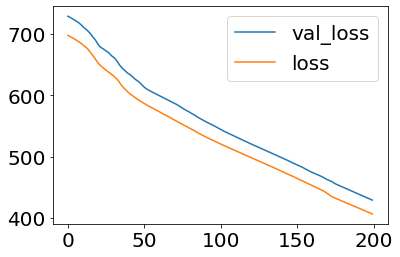

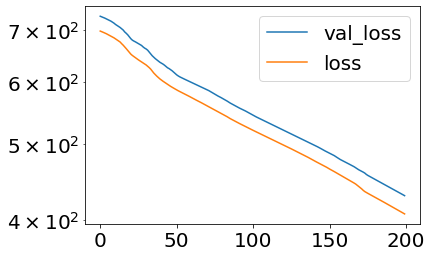

Loss: {'train': 17.893974237158744, 'test': 18.57735610475727}
Perturbation must be small but delta_0=0.917596, consider increasing n
Trying 11 1.000000


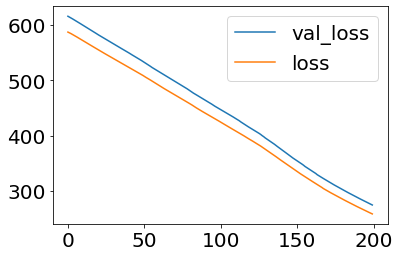

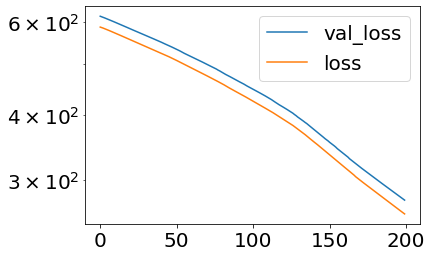

Loss: {'train': 13.26021920714048, 'test': 14.08002380296296}
Perturbation must be small but delta_0=0.389297, consider increasing n
Trying 21 1.000000


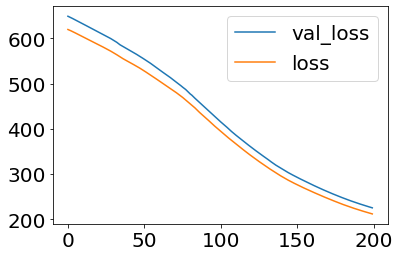

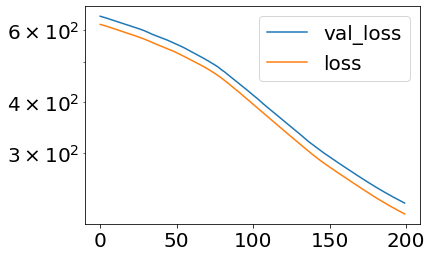

Loss: {'train': 11.47337122907733, 'test': 12.450578051922367}
Perturbation must be small but delta_0=0.245789, consider increasing n
Trying 31 1.000000


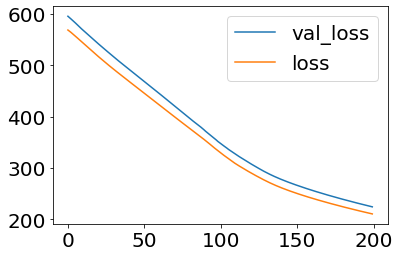

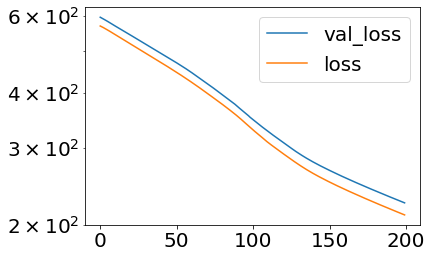

Loss: {'train': 11.414704039073227, 'test': 12.398361148086249}
Need N = 31, mu=1.00 and R = 20
To achieve eps=1.000000 delta=0.000010 fault tolerance


In [14]:
while True:
    print('Trying %d %f' % (N, mu))
    r = train_the_net(N = N, mu = mu)
    if r['q'] <= 1e-2:
        print("Q must be >0.01, consider increasing mu")
        mu = 2 * mu
        continue
        
    # delta_0 from Prop. 3
    delta_0 = np.exp(-N * d_kl(alpha, p) * r['q'])
    if delta_0 > 1. / 6:
        print("Perturbation must be small but delta_0=%f, consider increasing n" % delta_0)
        inc_n()
        continue
        
    if r['mean'] >= eps_target:
        print("Cannot do better than the mean, infeasible!")
        break
        
    # t from Prop. 5
    # sum to make it a scalar
    t = np.sum(eps_target - r['mean'])
    
    if t ** (-2) * r['std'] ** 2 >= 1. / 6:
        print("Must have eps^2 ~ Variance, otherwise Chebyshev would not work!")
        inc_n()
        continue
        
    # now we have delta_0 < 1/6 and delta-delta_0 < 1 / 6 which makes delta < 1/3
    
    # computing the number of repetitions
    # (1/3)^(R/2)<delta_target -> delta_target => R = 2 log (1 / delta_target) / log(3)
    R = 2 * np.log(1 / delta_target) / np.log(3)
    
    print('Need N = %d, mu=%.2f and R = %d' % (N, mu, R))
    print('To achieve eps=%f delta=%f fault tolerance' % (eps_target, delta_target))
    
    break

Empirically validating that $\delta<1/3$

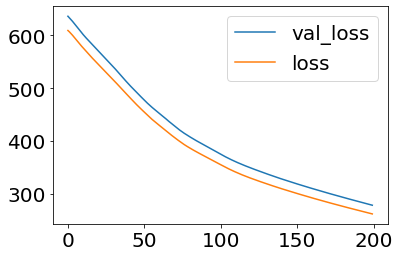

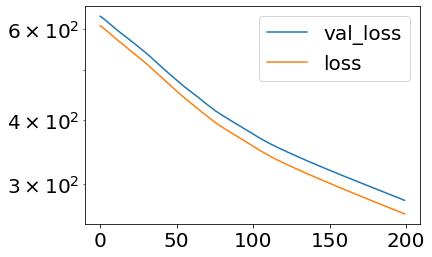

In [15]:
# taking the net
exp = BostonHousingExperiment(N = [41, 49], p_inference = [0, p, 0, 0], seed = int(np.random.random() * 100000),
                                  activation = 'sigmoid', epochs = 200, do_print = 'plot',
                                  reg_coeff = 1, reg_type = 'balanced')

In [16]:
def experimental_error():
    """ Experimental delta_L+1 on input x, y """
    return exp.get_mse_crash_data(x, y, repetitions = 1) - exp.get_mse_correct_data(x, y)

In [17]:
# the experimental error
dta = [experimental_error() for _ in range(10000)]

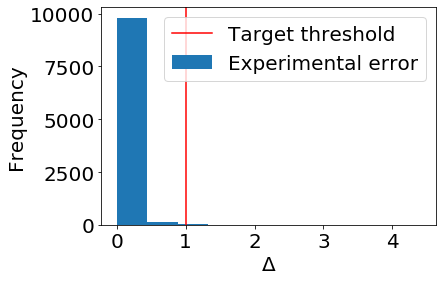

In [18]:
# histogram
plt.hist(dta, label = 'Experimental error')
plt.axvline(eps_target, label = 'Target threshold', color = 'red')
plt.legend()
plt.xlabel('$\Delta$')
plt.ylabel('Frequency')
plt.show()

In [19]:
assert np.mean(np.array(dta) > eps_target) < 1. / 3, "Tail bound must be valid"

The bound is valid

In [20]:
print("If no errors, the test has passed successfully")

If no errors, the test has passed successfully
